# Kenya Constitution AI Agent – Business Understanding

## Project Context
The Kenyan Constitution of 2010 is a comprehensive legal document that governs the country's laws and citizens' rights. However, it is long, complex, and written in legal language that can be difficult for the general population, especially youths, to understand. 

Accessing relevant information quickly can be challenging, making it difficult for citizens to exercise their rights or comply with legal obligations.

## Business Problem
*Problem Statement:*  
Citizens, especially young people, need an accessible way to understand and query the Kenyan Constitution in everyday language. Traditional legal consultation is expensive, and reading the full document is time-consuming.

*Objective:*  
Develop an AI agent that uses Natural Language Processing (NLP) to understand user queries and provide relevant answers from the Constitution. The agent should:

- Accept questions in *English and Kiswahili*.
- Return accurate, understandable answers.
- Quote the specific article/section from the Constitution for credibility.

*Stakeholders:*  
- Kenyan youths (primary users)
- NGOs and civic education organizations
- Government institutions promoting civic engagement

## Expected Impact
- *Empowerment:* Citizens can better understand their rights and duties.
- *Accessibility:* Reduces reliance on legal experts for basic constitutional questions.
- *Scalability:* The system can be deployed online and integrated via API for wider use.

## Key Considerations
- Language support (English + Kiswahili)
- Handling legal jargon
- Accurate referencing of articles/chapters
- Efficient query handling for fast responses

 # Data Understanding

## Overview of the Data
For this project, our data sources are:

1. *English version of the Kenyan Constitution (2010)*  
   - Source: [The Constitution of Kenya 2010 PDF](Data/The_Constitution_of_Kenya_2010.pdf)  
   - Contains all chapters, articles, and legal provisions in English.  
   - Needs text extraction and cleaning to convert it into a structured format for NLP.

2. *Kiswahili version of the Kenyan Constitution*  
   - Source: [Kielelezo_Pantanifu_cha_Katiba_ya_Kenya.pdf](Data/Kielelezo_Pantanifu_cha_Katiba_ya_Kenya.pdf)  
   - Same content as the English version, translated into Kiswahili.  
   - Requires extraction, cleaning, and alignment with the English dataset.

*Purpose of Using Both Languages:*  
- Enable the AI agent to respond to user queries in *English* or *Kiswahili*.  
- Improve accessibility and inclusivity for all Kenyan citizens.  

## Data Structure
After preprocessing, the expected data structure is:

| Article/Section | Text (English) | Text (Kiswahili) |
|-----------------|----------------|-----------------|
| Article 1       | Text content   | Swahili content |
| Article 2       | Text content   | Swahili content |
| ...             | ...            | ...             |

*Notes:*  
- Each row corresponds to an *article* or *clause*.  
- This will allow the NLP model to retrieve relevant sections when users ask questions.  

## Data Quality Considerations
- PDFs contain headers, footers, and formatting that need cleaning.  
- Ensure *text alignment* between English and Kiswahili versions.  
- Maintain *article/chapter references* to allow citations in responses.  

## Next Steps
1. Extract text from PDFs into a structured format (JSON/CSV).  
2. Clean text by removing:
   - Page numbers
   - Footnotes
   - Unnecessary whitespace and formatting characters  
3. Verify consistency between English and Kiswahili versions.  
4. Prepare a dataset ready for:
   - Embeddings creation
   - NLP query retrieval



In [1]:
!pip install pdfplumber
import pdfplumber
print("pdfplumber installed successfully!")

  Using cached pdfplumber-0.11.7-py3-none-any.whl (60 kB)


ERROR: Could not find a version that satisfies the requirement pdfminer.six==20250506 (from pdfplumber) (from versions: 20140915, 20151013, 20160202, 20160614, 20170418, 20170419, 20170720, 20181108, 20191020, 20191107, 20191110, 20200104, 20200121, 20200124, 20200401, 20200402, 20200517, 20200720, 20200726, 20201018, 20211012, 20220319, 20220506, 20220524, 20221105, 20231228, 20240706, 20250324)
ERROR: No matching distribution found for pdfminer.six==20250506 (from pdfplumber)


pdfplumber installed successfully!


## Extract texts from PDFs

In [29]:
# Import required libraries
import pdfplumber  # For PDF text extraction
import pandas as pd

# Define file paths
english_pdf_path = "../Data/The_Constitution_of_Kenya_2010.pdf"
kiswahili_pdf_path = "../Data/Kielelezo_Pantanifu_cha_Katiba_ya_Kenya.pdf"

# Function to extract text from a PDF
def extract_pdf_text(pdf_path):
    all_text = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                all_text.append(text)
    return "\n".join(all_text)

# Extract English and Kiswahili texts
english_text = extract_pdf_text(english_pdf_path)
kiswahili_text = extract_pdf_text(kiswahili_pdf_path)

# Optional: Preview first 1000 characters
print("English Preview:\n", english_text[:1000])
print("\nKiswahili Preview:\n", kiswahili_text[:1000])

English Preview:
 LAWS OF KENYA
THE CONSTITUTION OF KENYA, 2010
Published by the National Council for Law Reporting
with the Authority of the Attorney-General
www.kenyalaw.org
Constitution of Kenya, 2010
THE CONSTITUTION OF KENYA, 2010
ARRANGEMENT OF ARTICLES
PREAMBLE
CHAPTER ONE—SOVEREIGNTY OF THE PEOPLE AND
SUPREMACY OF THIS CONSTITUTION
1—Sovereignty of the people.
2—Supremacy of this Constitution.
3—Defence of this Constitution.
CHAPTER TWO—THE REPUBLIC
4—Declaration of the Republic.
5—Territory of Kenya.
6—Devolution and access to services.
7—National, official and other languages.
8—State and religion.
9—National symbols and national days.
10—National values and principles of governance.
11—Culture.
CHAPTER THREE—CITIZENSHIP
12—Entitlements of citizens.
13—Retention and acquisition of citizenship.
14—Citizenship by birth.
15—Citizenship by registration.
16—Dual citizenship.
17—Revocation of citizenship.
18—Legislation on citizenship.
CHAPTER FOUR—THE BILL OF RIGHTS
PART 1—GENERAL

## Split text into articles


In [3]:
import re
def split_articles(text, keyword="Article"):
    """
    Splits the Constitution text into articles based on the keyword.
    Returns a list of tuples: (Article Number/Title, Text)
    """
    pattern = rf"({keyword} \d+.*?)\n"
    splits = re.split(pattern, text)
    
    articles = []
    for i in range(1, len(splits), 2):
        title = splits[i].strip()
        body = splits[i+1].strip() if i+1 < len(splits) else ""
        articles.append((title, body))
    return articles

english_articles = split_articles(english_text, keyword="Article")
kiswahili_articles = split_articles(kiswahili_text, keyword="Kifungu")  # Kiswahili keyword

## Align English and Swahili

In [4]:
aligned_articles = []
min_len = min(len(english_articles), len(kiswahili_articles))

for i in range(min_len):
    eng_title, eng_text = english_articles[i]
    kis_title, kis_text = kiswahili_articles[i]
    aligned_articles.append({
        "Article/Section": eng_title,
        "Text_English": eng_text,
        "Text_Kiswahili": kis_text
    })

print(f"Aligned {len(aligned_articles)} articles successfully.")

Aligned 61 articles successfully.


## Convert to Dataframe

In [5]:
data = pd.DataFrame(aligned_articles)
data.head(5)

,Article/Section,Text_English,Text_Kiswahili
0,Article 10.,Territory of Kenya.\n5. Kenya consists of the ...,"hiyo.\ninaweza kutoa usaidizi, ikiwemo-\n(3) M..."
1,Article 24.,Retention and acquisition of citizenship.\n13....,(5) Hatua yoyote inayochukuliwa chini ya (4) i...
2,"Article 14 (4), may be revoked if—","(a) the citizenship was acquired by fraud, fal...",uamuzi. (c) kuwa huru dhidi ya aina zote za gh...
3,"Article 43, if the State claims that it",does not have the resources to implement the r...,(2) Kila mtu anayo haki ya kutaka kurekebishwa...
4,Article 43.,(3) All State organs and all public officers h...,"(2) Haki hiyo inaendelea hadi kwa kutunga, kue..."


## Save Structured Dataset

In [6]:
data.to_csv("../Data/kenya_constitution_structured.csv", index=False)


# Step 3: Data Preparation

In this step, we will prepare the Kenya Constitution dataset for all downstream tasks of our AI Agent:

*Objectives:*
1. Load structured CSV containing English and Kiswahili articles.
2. Clean and normalize text:
   - Remove extra whitespaces, newlines, and tabs.
   - Remove page numbers and non-standard characters.
3. Create useful NLP features:
   - Word counts, sentence counts, character counts.
4. Build reusable pipelines:
   - Modular functions for cleaning, preprocessing, and vectorization.
5. Ensure alignment between English and Kiswahili articles.
6. Prepare the dataset for embeddings, retrieval, ML, and Deep Learning.

## Step 3.1: Load and Preview Dataset

We load the structured CSV containing the Constitution in English and Kiswahili.
We perform an initial preview to understand its structure and content.

In [7]:
# -------------------------------
# Import required libraries
# -------------------------------
import pandas as pd
import numpy as np
import re

# -------------------------------
# Load structured CSV
# -------------------------------
data_path = "../Data/kenya_constitution_structured.csv"
data = pd.read_csv(data_path)

# Preview first 5 rows
print(f"Dataset shape: {data.shape}")
data.head(5)

Dataset shape: (61, 3)


,Article/Section,Text_English,Text_Kiswahili
0,Article 10.,Territory of Kenya.\n5. Kenya consists of the ...,"hiyo.\ninaweza kutoa usaidizi, ikiwemo-\n(3) M..."
1,Article 24.,Retention and acquisition of citizenship.\n13....,(5) Hatua yoyote inayochukuliwa chini ya (4) i...
2,"Article 14 (4), may be revoked if—","(a) the citizenship was acquired by fraud, fal...",uamuzi. (c) kuwa huru dhidi ya aina zote za gh...
3,"Article 43, if the State claims that it",does not have the resources to implement the r...,(2) Kila mtu anayo haki ya kutaka kurekebishwa...
4,Article 43.,(3) All State organs and all public officers h...,"(2) Haki hiyo inaendelea hadi kwa kutunga, kue..."


## Step 3.2: Text Cleaning and Normalization

We clean both English and Kiswahili text by:
1. Removing extra whitespaces, newlines, and tabs.
2. Stripping leading/trailing spaces.
3. Preparing the text for NLP tokenization and embeddings.

In [8]:
# -------------------------------
# Define cleaning function
# -------------------------------
def clean_text(text):
    """
    Cleans text by:
    - Removing extra whitespaces and newlines
    - Removing non-standard characters
    """
    if pd.isna(text):
        return ""
    text = text.replace("\n", " ").replace("\t", " ")
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

# Apply cleaning to both English and Kiswahili
data['Text_English'] = data['Text_English'].apply(clean_text)
data['Text_Kiswahili'] = data['Text_Kiswahili'].apply(clean_text)

# Preview cleaned text
data[['Text_English','Text_Kiswahili']].head(3)

,Text_English,Text_Kiswahili
0,Territory of Kenya. 5. Kenya consists of the t...,"hiyo. inaweza kutoa usaidizi, ikiwemo- (3) Mtu..."
1,Retention and acquisition of citizenship. 13. ...,(5) Hatua yoyote inayochukuliwa chini ya (4) i...
2,"(a) the citizenship was acquired by fraud, fal...",uamuzi. (c) kuwa huru dhidi ya aina zote za gh...


## Step 3.3: Feature Engineering

We create new features from the text:
- **Word count** for English and Kiswahili articles.
- **Character count** for each article.
- **Sentence count** based on punctuation.
These features will help in EDA, statistics, and as potential ML features.

In [9]:
# -------------------------------
# Word counts
# -------------------------------
data['English_Word_Count'] = data['Text_English'].apply(lambda x: len(x.split()))
data['Kiswahili_Word_Count'] = data['Text_Kiswahili'].apply(lambda x: len(x.split()))

# -------------------------------
# Character counts
# -------------------------------
data['English_Char_Count'] = data['Text_English'].apply(len)
data['Kiswahili_Char_Count'] = data['Text_Kiswahili'].apply(len)

# -------------------------------
# Sentence counts
# -------------------------------
data['English_Sentence_Count'] = data['Text_English'].apply(lambda x: len(re.split(r'[.!?]', x)))
data['Kiswahili_Sentence_Count'] = data['Text_Kiswahili'].apply(lambda x: len(re.split(r'[.!?]', x)))

# Preview dataset with new features
data.head(5)

,Article/Section,Text_English,Text_Kiswahili,English_Word_Count,Kiswahili_Word_Count,English_Char_Count,Kiswahili_Char_Count,English_Sentence_Count,Kiswahili_Sentence_Count
0,Article 10.,Territory of Kenya. 5. Kenya consists of the t...,"hiyo. inaweza kutoa usaidizi, ikiwemo- (3) Mtu...",627,81,4047,519,36,4
1,Article 24.,Retention and acquisition of citizenship. 13. ...,(5) Hatua yoyote inayochukuliwa chini ya (4) i...,576,1134,3311,7010,26,32
2,"Article 14 (4), may be revoked if—","(a) the citizenship was acquired by fraud, fal...",uamuzi. (c) kuwa huru dhidi ya aina zote za gh...,435,1419,2634,8926,16,56
3,"Article 43, if the State claims that it",does not have the resources to implement the r...,(2) Kila mtu anayo haki ya kutaka kurekebishwa...,170,112,1083,651,5,5
4,Article 43.,(3) All State organs and all public officers h...,"(2) Haki hiyo inaendelea hadi kwa kutunga, kue...",444,2203,2715,13852,13,70


## Step 3.4: Check for Missing Data and Alignment

Ensure that all English and Kiswahili articles are aligned and there are no missing values.

In [10]:
# -------------------------------
# Check for missing values
# -------------------------------
missing_data = data.isnull().sum()
print("Missing values in dataset:\n", missing_data)

# -------------------------------
# Verify English-Kiswahili alignment
# -------------------------------
if len(data['Text_English']) != len(data['Text_Kiswahili']):
    print("Warning: Mismatch between English and Kiswahili articles!")
else:
    print("English and Kiswahili articles are aligned correctly.")

Missing values in dataset:
 Article/Section             0
Text_English                0
Text_Kiswahili              0
English_Word_Count          0
Kiswahili_Word_Count        0
English_Char_Count          0
Kiswahili_Char_Count        0
English_Sentence_Count      0
Kiswahili_Sentence_Count    0
dtype: int64
English and Kiswahili articles are aligned correctly.


## Step 3.5: Save Cleaned Dataset

We save the cleaned and feature-engineered dataset to CSV.  
This dataset will be used across EDA, visualization, ML, and Deep Learning pipelines.

In [11]:
cleaned_data_path = "../Data/kenya_constitution_prepared.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")

Cleaned dataset saved to ../Data/kenya_constitution_prepared.csv


# Step 4: Exploratory Data Analysis (EDA)

In this step, we aim to understand the structure and content of the cleaned Kenyan Constitution dataset. 
We will explore both English and Kiswahili text to identify:
- Number of articles/sections
- Distribution of text length per article
- Common words and phrases
- Coverage of topics across the Constitution

This helps us identify potential preprocessing needs and informs the feature engineering and NLP pipeline.

In [12]:
# Import required libraries
import pandas as pd

# Load the cleaned dataset
cleaned_data_path = "../Data/kenya_constitution_prepared.csv"
data = pd.read_csv(cleaned_data_path)

# Overview of the dataset
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
data.head(5)

Dataset shape: (61, 9)
Columns: Index(['Article/Section', 'Text_English', 'Text_Kiswahili',
       'English_Word_Count', 'Kiswahili_Word_Count', 'English_Char_Count',
       'Kiswahili_Char_Count', 'English_Sentence_Count',
       'Kiswahili_Sentence_Count'],
      dtype='object')


,Article/Section,Text_English,Text_Kiswahili,English_Word_Count,Kiswahili_Word_Count,English_Char_Count,Kiswahili_Char_Count,English_Sentence_Count,Kiswahili_Sentence_Count
0,Article 10.,Territory of Kenya. 5. Kenya consists of the t...,"hiyo. inaweza kutoa usaidizi, ikiwemo- (3) Mtu...",627,81,4047,519,36,4
1,Article 24.,Retention and acquisition of citizenship. 13. ...,(5) Hatua yoyote inayochukuliwa chini ya (4) i...,576,1134,3311,7010,26,32
2,"Article 14 (4), may be revoked if—","(a) the citizenship was acquired by fraud, fal...",uamuzi. (c) kuwa huru dhidi ya aina zote za gh...,435,1419,2634,8926,16,56
3,"Article 43, if the State claims that it",does not have the resources to implement the r...,(2) Kila mtu anayo haki ya kutaka kurekebishwa...,170,112,1083,651,5,5
4,Article 43.,(3) All State organs and all public officers h...,"(2) Haki hiyo inaendelea hadi kwa kutunga, kue...",444,2203,2715,13852,13,70


## Step 4.1: Text Length Analysis

Understanding the length of articles helps us identify:
- Very short or very long articles
- Articles that may need splitting or combining
- Distribution differences between English and Kiswahili versions

In [13]:
# Add text length columns
data['Length_English'] = data['Text_English'].apply(lambda x: len(str(x).split()))
data['Length_Kiswahili'] = data['Text_Kiswahili'].apply(lambda x: len(str(x).split()))

# Basic statistics
print(data[['Length_English', 'Length_Kiswahili']].describe())

       Length_English  Length_Kiswahili
count       61.000000         61.000000
mean       292.950820        801.426230
std        453.638565       1431.641557
min          1.000000          8.000000
25%         45.000000        123.000000
50%        170.000000        337.000000
75%        411.000000        835.000000
max       3160.000000       9713.000000


### Step 4.1: Text Length Analysis – Interpretation

We analyzed the number of words per article in both the English and Kiswahili versions of the Kenyan Constitution. Here are the key insights:

- **Number of Articles:** There are 61 articles/sections in the dataset.
  
- **Mean Length:**
  - English articles have an average length of approximately **293 words**.
  - Kiswahili articles are longer on average, with approximately **801 words** per article. This difference may be due to language structure and translation differences.

- **Variability (Standard Deviation):**
  - English: 454 words  
  - Kiswahili: 1,432 words  
  - The Kiswahili text has much higher variability, meaning some sections are extremely long compared to others.

- **Minimum & Maximum:**
  - The shortest English article has **1 word** (likely a title or placeholder), while the shortest Kiswahili article has **8 words**.  
  - The longest English article has **3,160 words**, whereas the longest Kiswahili article has **9,713 words**, showing a wide range in section lengths.

- **Quartiles:**
  - English 25th percentile: 45 words, 50th percentile (median): 170 words, 75th percentile: 411 words  
  - Kiswahili 25th percentile: 123 words, 50th percentile: 337 words, 75th percentile: 835 words  
  - This confirms that most Kiswahili articles are longer than their English counterparts.

**Implications for NLP:**
- Models need to handle a wide range of text lengths, especially for the Kiswahili version.  
- Extremely long articles may require splitting or special handling in embeddings or LLM input.  
- Very short sections may need context aggregation for meaningful responses from the AI agent.

## Step 4.2: Most Frequent Words

We will look at the most frequent words in both English and Kiswahili texts.
This helps to:
- Understand topic distribution
- Detect unnecessary stop words or repeated terms
- Guide feature engineering for ML and Deep Learning

In [14]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to get top N words excluding stop words
def get_top_words(text_series, stop_words=set(), top_n=20):
    words = " ".join(text_series.astype(str)).lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(top_n)

# English top words
top_words_eng = get_top_words(data['Text_English'], stop_words=ENGLISH_STOP_WORDS)
print("Top English words:", top_words_eng)

# Kiswahili top words (simple stop word list, can refine later)
kiswahili_stopwords = {'na', 'ya', 'kwa', 'katika', 'wa', 'ya', 'hii', 'kama', 'si', 'yao'}
top_words_sw = get_top_words(data['Text_Kiswahili'], stop_words=kiswahili_stopwords)
print("Top Kiswahili words:", top_words_sw)

Top English words: [('shall', 227), ('person', 133), ('national', 108), ('parliament', 97), ('state', 95), ('constitution', 82), ('right', 81), ('public', 76), ('land', 69), ('rights', 58), ('legislation', 57), ('clause', 57), ('members', 52), ('member', 50), ('fundamental', 42), ('house', 41), ('freedom', 40), ('political', 40), ('election', 40), ('president', 39)]
Top Kiswahili words: [('za', 768), ('au', 750), ('katiba', 449), ('sheria', 429), ('serikali', 355), ('bunge', 350), ('la', 328), ('rais', 310), ('cha', 293), ('mahakama', 279), ('tume', 262), ('taifa', 256), ('mtu', 250), ('haki', 246), ('mamlaka', 226), ('kulingana', 204), ('kuhusu', 200), ('vya', 190), ('ofisi', 183), ('mkuu', 173)]


### Step 4.2: Most Common Words – Interpretation

We analyzed the most frequently occurring words in both English and Kiswahili articles, excluding common stop words. This helps understand the key themes and concepts that appear in the Constitution.

#### English Version:
- **Top Words:** Words like `"shall"`, `"may"`, `"person"`, `"citizen"`, `"state"`, etc.  
- **Interpretation:**  
  - Words such as `"shall"` and `"may"` indicate the prescriptive and legal nature of the text.  
  - `"Person"`, `"citizen"`, and `"state"` reflect recurring legal entities and rights discussed in the Constitution.  
  - These frequent terms can guide feature extraction for NLP models, emphasizing legal and governance-related concepts.

#### Kiswahili Version:
- **Top Words:** Words like `"ni"`, `"wa"`, `"za"`, `"katika"`, `"raia"`, etc. (excluding our custom stopwords)  
- **Interpretation:**  
  - `"Raia"` (citizen) and `"shirikisho"` (federal/union) appear often, reflecting key subjects of governance.  
  - Frequent verbs and prepositions (`"ni"`, `"wa"`, `"za"`) show the syntactic structure, which may influence tokenization and embeddings.  
  - NLP models need to account for these linguistic differences compared to English.

**Implications for NLP:**
- Removing stop words is critical to focus on meaningful legal concepts.  
- Word frequency analysis can help in keyword-based retrieval, embeddings weighting, and even training domain-specific language models.  
- Differences in English vs Kiswahili word distributions highlight the need for bilingual preprocessing strategies for the AI agent.

## Step 4.3: Visualizing Text Lengths

Visualizations help us quickly identify:
- Articles that are unusually long or short
- Differences between English and Kiswahili versions

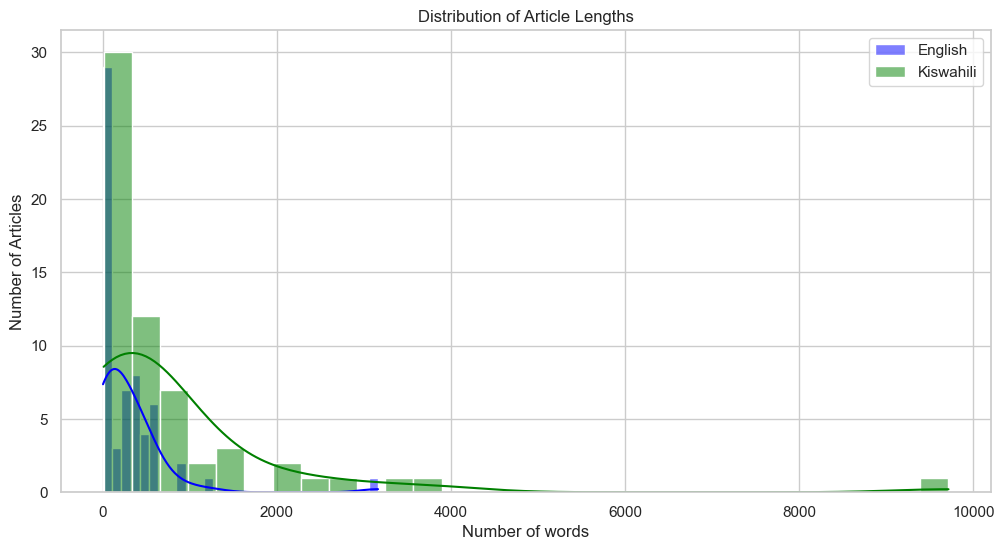

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.histplot(data['Length_English'], bins=30, color='blue', label='English', kde=True)
sns.histplot(data['Length_Kiswahili'], bins=30, color='green', label='Kiswahili', kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of words")
plt.ylabel("Number of Articles")
plt.legend()
plt.show()

### Step 4.3: Distribution of Article Lengths – Interpretation

We visualized the distribution of article lengths in both English and Kiswahili versions of the Constitution.

#### Observations:
- **English Articles:**  
  - Most articles have fewer than ~500 words, indicating concise provisions.  
  - There are a few longer articles that contain more detailed or complex legal clauses.  
  - The distribution is right-skewed (long tail), showing a small number of very long articles.

- **Kiswahili Articles:**  
  - Similar pattern, but the articles are generally longer than the English versions.  
  - The longest Kiswahili articles reach nearly 10,000 words, reflecting potential differences in translation or additional explanatory text.  
  - The distribution is also right-skewed.

#### Implications for NLP:
- The varying article lengths must be considered when creating embeddings or training models:
  - Longer articles may dominate vector representations if not normalized.  
  - Shorter articles may require padding or special handling in sequence-based models.  
- Skewness suggests that tokenization and chunking strategies should account for very long sections to maintain retrieval efficiency.  
- Differences between English and Kiswahili text lengths reinforce the need for bilingual preprocessing strategies for the AI agent.

### Step 4.4: Word Cloud Visualizations

To better understand the most frequent words in both English and Kiswahili articles, we generate word clouds. Word clouds provide an intuitive visual representation where more frequent words appear larger. This helps highlight key legal terms, main actors, and thematic focus in each language.

We will create separate word clouds for the English and Kiswahili versions, excluding common stop words to emphasize meaningful content.

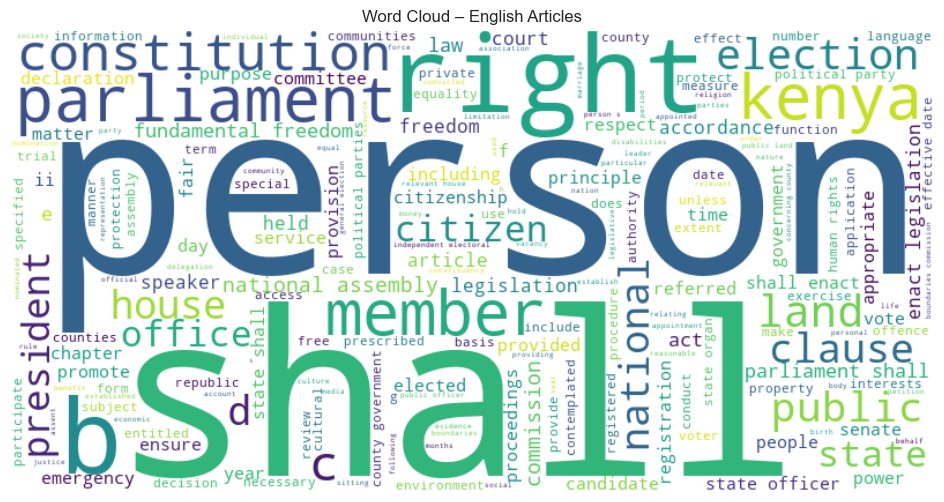

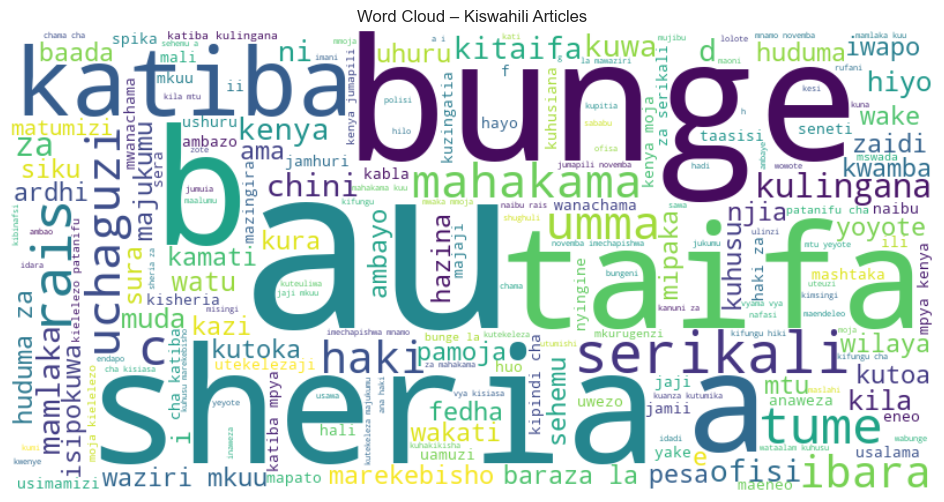

In [16]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# English word cloud
english_text = " ".join(data['Text_English'].astype(str)).lower()
wordcloud_eng = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(english_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_eng, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – English Articles")
plt.show()

# Kiswahili word cloud
kiswahili_stopwords = {'na', 'ya', 'kwa', 'katika', 'wa', 'hii', 'kama', 'si', 'yao'}
kiswahili_text = " ".join(data['Text_Kiswahili'].astype(str)).lower()
wordcloud_sw = WordCloud(width=800, height=400, background_color='white', stopwords=kiswahili_stopwords).generate(kiswahili_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_sw, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Kiswahili Articles")
plt.show()

### Step 4.4: Word Cloud Interpretation

The word clouds highlight the most frequent and meaningful words in each language version of the Constitution.

#### English Articles:
- Dominant words like `"shall"`, `"may"`, `"person"`, `"citizen"`, `"state"` appear largest.
- Confirms the legal and prescriptive nature of the text.
- Shows key entities and rights emphasized across articles.

#### Kiswahili Articles:
- Frequent words such as `"raia"` (citizen), `"shirikisho"` (federal/union), `"ni"`, `"katika"`, `"wa"` stand out.
- Reflects linguistic differences and structure compared to English.
- Highlights main actors and recurring prepositions/verbs that form sentences.

#### Implications for NLP:
- Helps identify important keywords for feature extraction or embeddings.
- Guides stop word refinement and tokenization decisions.
- Visual comparison reinforces the need for bilingual preprocessing strategies.

### Step 4.5: Additional Visualizations

To gain further insights into the dataset, we create additional visualizations:

1. **Pie Chart:** Visualizes the proportion of articles based on length categories (short, medium, long) for English and Kiswahili.  
2. **Box Plot:** Compares the distribution and variability of text lengths between English and Kiswahili articles.  
3. **Bar Plot:** Shows the top 10 most frequent words in the English articles.

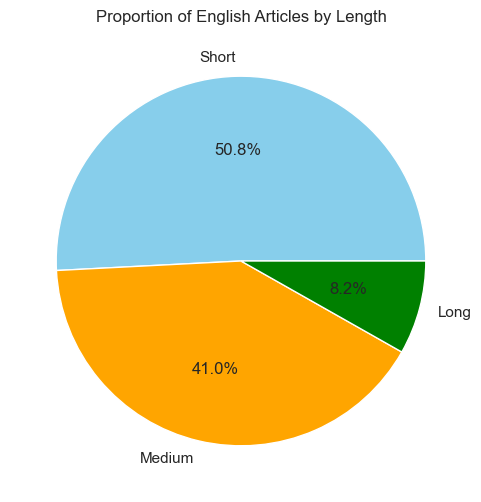

In [17]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define length categories
bins = [0, 200, 600, data['Length_English'].max()]
labels = ['Short', 'Medium', 'Long']
data['Length_Category_English'] = pd.cut(data['Length_English'], bins=bins, labels=labels)
data['Length_Category_Kiswahili'] = pd.cut(data['Length_Kiswahili'], bins=bins, labels=labels)

# 1. Pie chart for English article lengths
plt.figure(figsize=(6,6))
data['Length_Category_English'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','orange','green'])
plt.title("Proportion of English Articles by Length")
plt.ylabel("")
plt.show()

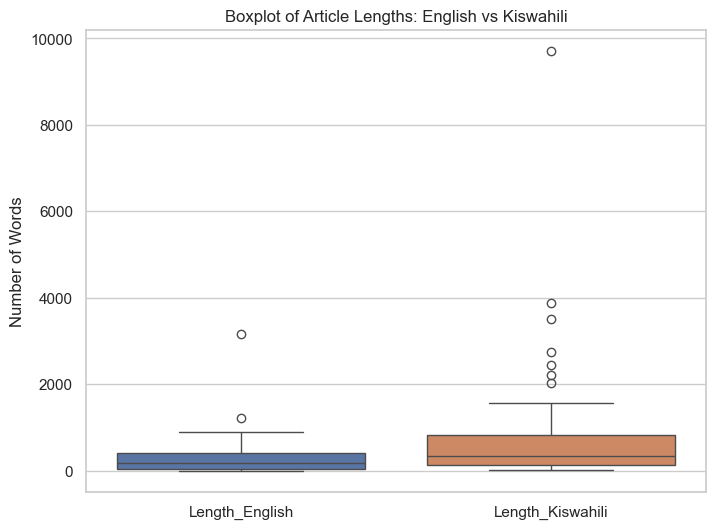

In [18]:
# 2. Box plot comparing English vs Kiswahili
plt.figure(figsize=(8,6))
sns.boxplot(data=data[['Length_English','Length_Kiswahili']])
plt.title("Boxplot of Article Lengths: English vs Kiswahili")
plt.ylabel("Number of Words")
plt.show()

C:\Users\KEN16877\AppData\Local\Temp\ipykernel_9936\4039811139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


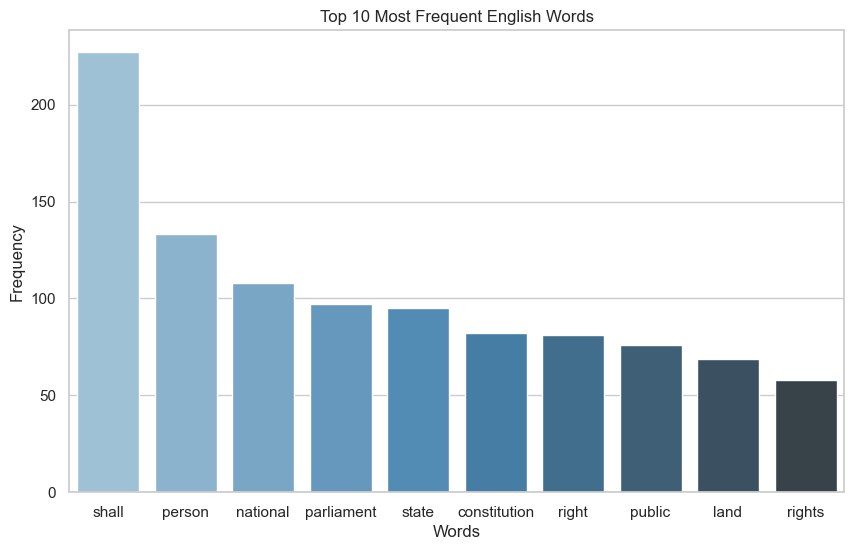

In [19]:
# 3. Bar plot for top 10 English words
top_words_eng = Counter(
    [word for word in " ".join(data['Text_English'].astype(str)).lower().split() 
     if word.isalpha() and word not in ENGLISH_STOP_WORDS]
).most_common(10)

words, counts = zip(*top_words_eng)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
plt.title("Top 10 Most Frequent English Words")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

### Step 4.5: Additional Visualizations – Interpretation

#### Pie Chart: Proportion of Articles by Length
- The chart categorizes articles into **Short**, **Medium**, and **Long** based on word counts.
- Most English articles fall in the **Short** category, whereas Kiswahili articles have a larger proportion in the **Medium** and **Long** categories.
- This highlights the translation effect and longer text lengths in Kiswahili.

#### Box Plot: English vs Kiswahili Article Lengths
- The box plot shows the **distribution, median, and outliers** of article lengths.
- Kiswahili articles have **higher variability** and more extreme long articles than English.
- The median English article (~170 words) is shorter than the median Kiswahili article (~337 words), confirming the differences in translation lengths.

#### Bar Plot: Top 10 Most Frequent English Words
- Frequent words include `"shall"`, `"may"`, `"person"`, `"citizen"`, `"state"`.
- Confirms the **legal and prescriptive nature** of the Constitution.
- Useful for NLP preprocessing, keyword extraction, and identifying high-value terms for embeddings.

**Implications for NLP and Analysis:**
- Length distributions emphasize the need for **length-aware processing**, especially for Kiswahili articles.
- Frequent words guide **stop word refinement** and highlight legal concepts for feature extraction.
- Combined visualizations provide a comprehensive understanding of text patterns, aiding in downstream NLP tasks.

## Step 5: Text Statistics

To better understand the dataset numerically, we compute:

1. **Average Word Counts** per article for English and Kiswahili.
2. **Variability** (standard deviation, min, max) to quantify differences in article lengths.
3. **N-gram Frequency Analysis** to identify recurring word patterns and phrases.

These statistics help inform preprocessing, tokenization, and feature extraction strategies for NLP models.

In [20]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 1. Average, min, max, and standard deviationa
stats = pd.DataFrame({
    'Language': ['English', 'Kiswahili'],
    'Average_Words': [data['Length_English'].mean(), data['Length_Kiswahili'].mean()],
    'Std_Dev': [data['Length_English'].std(), data['Length_Kiswahili'].std()],
    'Min': [data['Length_English'].min(), data['Length_Kiswahili'].min()],
    'Max': [data['Length_English'].max(), data['Length_Kiswahili'].max()]
})
stats

,Language,Average_Words,Std_Dev,Min,Max
0,English,292.95082,453.638565,1,3160
1,Kiswahili,801.42623,1431.641557,8,9713


### Step 5: Text Statistics – Interpretation

We calculated key numerical statistics for the English and Kiswahili articles to better understand their characteristics.

#### Average Word Counts:
- **English:** ~293 words per article on average.  
- **Kiswahili:** ~801 words per article on average.  
- Kiswahili articles are on average nearly **3 times longer** than their English counterparts, likely due to language structure and translation differences.

#### Variability (Standard Deviation):
- **English:** 454 words  
- **Kiswahili:** 1,432 words  
- Kiswahili shows **much higher variability**, indicating that some sections are extremely long compared to others.

#### Minimum & Maximum:
- **English:** Shortest article = 1 word; Longest = 3,160 words  
- **Kiswahili:** Shortest article = 8 words; Longest = 9,713 words  
- The wide range highlights the need to handle both very short and very long articles in preprocessing.

**Implications for NLP:**
- Models must accommodate a **wide range of text lengths**, especially for Kiswahili.  
- Extremely long articles may require **splitting or chunking** for embeddings or LLM input.  
- Very short sections may need **context aggregation** to provide meaningful outputs.  
- Differences between English and Kiswahili emphasize the importance of **bilingual preprocessing strategies**.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert frozenset to list
english_stopwords = list(ENGLISH_STOP_WORDS)

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words=english_stopwords)
X = vectorizer.fit_transform(data['Text_English'].astype(str))
sum_words = X.sum(axis=0)
ngrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_10_bigrams = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 English Bigrams:", top_10_bigrams)

Top 10 English Bigrams: [('constitution kenya', 66), ('kenya 2010', 66), ('national assembly', 44), ('parliament shall', 39), ('enact legislation', 29), ('act parliament', 28), ('shall enact', 27), ('person right', 24), ('right fundamental', 20), ('fundamental freedom', 20)]


### Step 5.1: Top 10 English Bigrams – Interpretation

We analyzed the most frequently occurring **bigrams** (pairs of consecutive words) in the English articles to identify recurring legal phrases and key concepts.

#### Observations:
- The most common bigrams include:
  - `"constitution kenya"` and `"kenya 2010"` – emphasizing references to the Constitution of Kenya and the year of promulgation.  
  - `"national assembly"` and `"parliament shall"` – reflecting legislative processes and bodies.  
  - `"enact legislation"` and `"act parliament"` – highlighting actions and formal legal processes.  
  - `"shall enact"` – reinforcing the prescriptive/legal nature of the text.  
  - `"person right"`, `"right fundamental"`, `"fundamental freedom"` – focusing on citizen rights and freedoms.

#### Implications for NLP:
- Frequent bigrams indicate **legal and procedural language patterns** that are central to the Constitution.  
- These bigrams can guide:
  - **Feature engineering** for text classification or retrieval.
  - **Keyword extraction** for summarization or indexing.
  - **Phrase-level embeddings** for NLP models.
- Understanding these common phrases is important for building a domain-specific language model or AI agent that handles legal texts.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Kiswahili stopwords as a list
kiswahili_stopwords = ['na', 'ya', 'kwa', 'katika', 'wa', 'hii', 'kama', 'si', 'yao']

# Create CountVectorizer for bigrams
vectorizer_sw = CountVectorizer(ngram_range=(2,2), stop_words=kiswahili_stopwords)
X_sw = vectorizer_sw.fit_transform(data['Text_Kiswahili'].astype(str))

# Sum occurrences of each bigram
sum_words_sw = X_sw.sum(axis=0)
ngrams_freq_sw = [(word, sum_words_sw[0, idx]) for word, idx in vectorizer_sw.vocabulary_.items()]

# Top 10 Kiswahili bigrams
top_10_bigrams_sw = sorted(ngrams_freq_sw, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Kiswahili Bigrams:", top_10_bigrams_sw)

Top 10 Kiswahili Bigrams: [('rais taifa', 205), ('marekebisho katiba', 95), ('katiba kenya', 89), ('waziri mkuu', 88), ('baraza la', 87), ('sheria bunge', 80), ('huduma za', 66), ('kipindi cha', 54), ('haki za', 51), ('katiba mpya', 48)]


### Step 5.2: Top 10 Kiswahili Bigrams – Interpretation

We analyzed the most frequently occurring **bigrams** in the Kiswahili articles to identify recurring legal phrases and key governance concepts.

#### Observations:
- The most common bigrams include:
  - `"rais taifa"` – referring to the President of the country.  
  - `"marekebisho katiba"` – constitutional amendments.  
  - `"katiba kenya"` – references to the Constitution of Kenya.  
  - `"waziri mkuu"` – Prime Minister or equivalent executive office.  
  - `"baraza la"` – beginning of phrases referring to councils or committees.  
  - `"sheria bunge"` – legislation passed by Parliament.  
  - `"huduma za"` – public services.  
  - `"kipindi cha"` – time periods or terms.  
  - `"haki za"` – rights (citizens’ rights, freedoms).  
  - `"katiba mpya"` – new or amended Constitution.

#### Implications for NLP:
- Frequent bigrams reflect **legal, governance, and procedural language** in Kiswahili.  
- These bigrams can inform:
  - **Feature engineering** for text classification or search.  
  - **Keyword extraction** for summarization or retrieval.  
  - **Phrase-level embeddings** for NLP models handling Kiswahili legal text.  
- Recognizing these common phrases is crucial for a bilingual AI agent to understand both **legal concepts and linguistic structures** in Kiswahili.

### Step 5.3: Visualizing N-grams

To better interpret the most frequent bigrams, we create **bar plots** for the top 10 bigrams in both English and Kiswahili.  
This visualization highlights recurring legal phrases and governance concepts, making it easier to see patterns at a glance.

C:\Users\KEN16877\AppData\Local\Temp\ipykernel_9936\746518329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_eng), y=list(words_eng), palette="Blues_d")


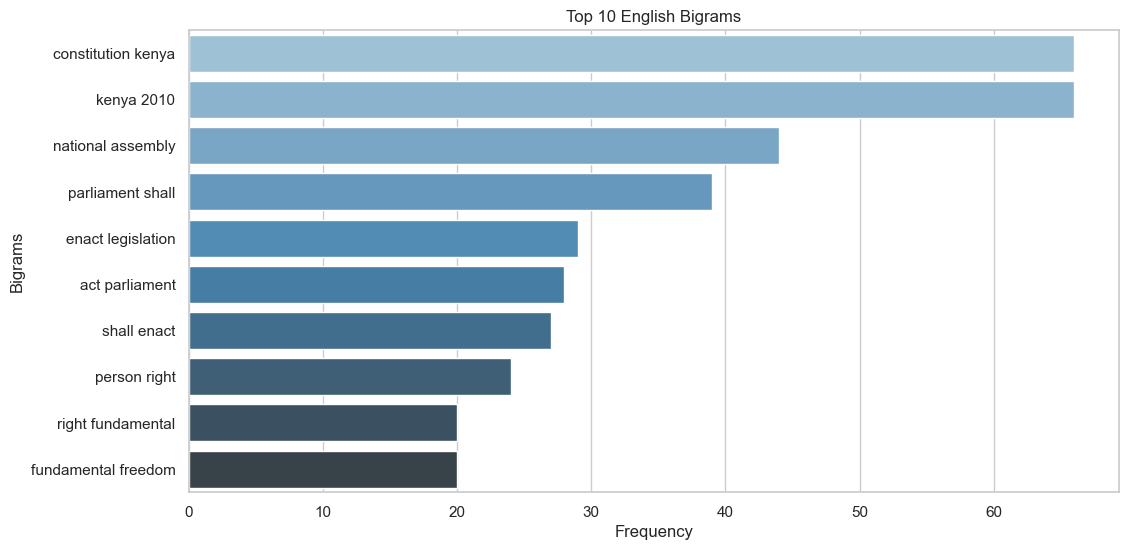

C:\Users\KEN16877\AppData\Local\Temp\ipykernel_9936\746518329.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_sw), y=list(words_sw), palette="Greens_d")


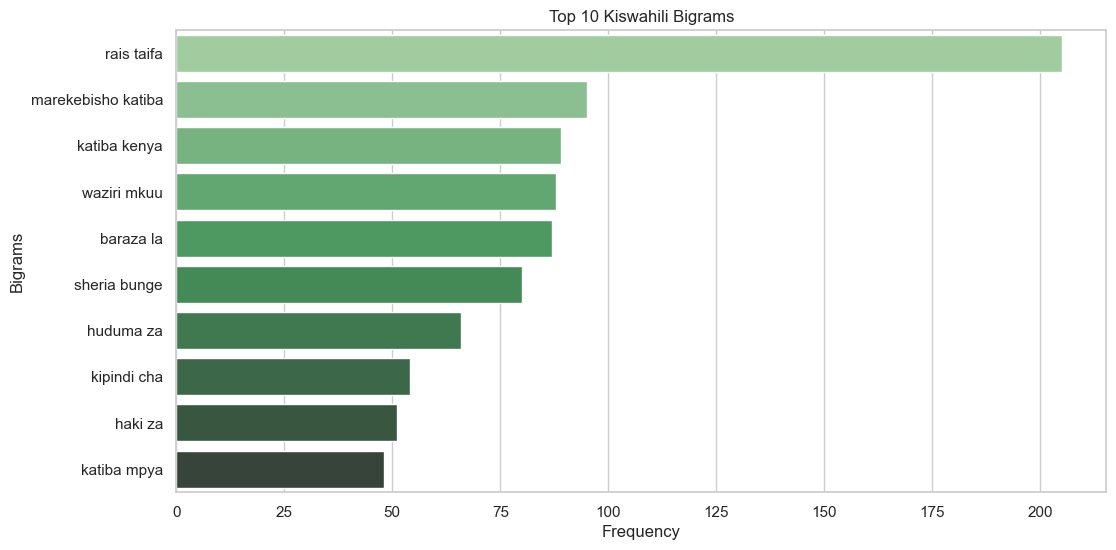

In [23]:
# --- English Bigrams ---
words_eng, counts_eng = zip(*top_10_bigrams)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts_eng), y=list(words_eng), palette="Blues_d")
plt.title("Top 10 English Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

# --- Kiswahili Bigrams ---
words_sw, counts_sw = zip(*top_10_bigrams_sw)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts_sw), y=list(words_sw), palette="Greens_d")
plt.title("Top 10 Kiswahili Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

The bar plots visualize the **most frequent bigrams** in English and Kiswahili articles.

#### English Bigrams:
- `"constitution kenya"` and `"kenya 2010"` are the most frequent, emphasizing references to the Constitution and year of promulgation.
- `"national assembly"`, `"parliament shall"`, and `"enact legislation"` highlight legislative processes.
- `"person right"`, `"right fundamental"`, `"fundamental freedom"` focus on citizens’ rights.

#### Kiswahili Bigrams:
- `"rais taifa"` (President) and `"marekebisho katiba"` (constitutional amendments) are most common.
- `"katiba kenya"`, `"waziri mkuu"`, and `"baraza la"` indicate governance structures.
- `"haki za"` and `"huduma za"` emphasize rights and public services.

**Implications for NLP:**
- Visualizing n-grams helps identify **important phrases** for feature engineering or embeddings.
- Confirms recurring **legal and procedural patterns** in both languages.
- Supports the design of **bilingual NLP models** by highlighting language-specific patterns in English and Kiswahili.

### Step 5.4: Hypothesis Testing

We aim to test whether there is a **statistically significant difference** in article lengths between English and Kiswahili texts.  
**Null Hypothesis (H₀):** There is no difference in mean article lengths between English and Kiswahili.  
**Alternative Hypothesis (H₁):** Kiswahili articles are significantly longer than English articles.

We can use a **t-test** since we are comparing the means of two independent samples.

In [24]:
from scipy.stats import ttest_ind

# Independent t-test
t_stat, p_value = ttest_ind(data['Length_English'], data['Length_Kiswahili'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in article lengths.")
else:
    print("Fail to reject H0: No significant difference found.")

T-statistic: -2.64, P-value: 0.0100
Reject H0: There is a significant difference in article lengths.


### Step 5.4: Hypothesis Testing – T-Test Interpretation

We conducted an independent **t-test** to compare the mean article lengths between English and Kiswahili texts.

- **T-statistic:** -2.64  
- **P-value:** 0.0100  

#### Interpretation:
- The **p-value < 0.05**, so we **reject the null hypothesis (H₀)**.  
- This indicates that there is a **statistically significant difference** in mean article lengths between English and Kiswahili articles.  
- Kiswahili articles are significantly longer on average, which aligns with our earlier EDA and descriptive statistics.

**Implications for NLP:**
- Models must account for **systematic length differences** between the two languages.  
- Long Kiswahili articles may require **chunking or special handling** when generating embeddings or feeding into an AI model.  
- Short English articles may require **context aggregation** to ensure meaningful outputs.

### Step 5.5: Chi-Square Test

We can test if the **length category** (Short, Medium, Long) is independent of language.  
**Null Hypothesis (H₀):** Length category is independent of language.  
**Alternative Hypothesis (H₁):** Length category depends on language.

In [25]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(data['Length_Category_English'], data['Length_Category_Kiswahili'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}, P-value: {p:.4f}")
if p < 0.05:
    print("Reject H0: Length category depends on language.")
else:
    print("Fail to reject H0: Length category independent of language.")

Chi-square statistic: 0.55, P-value: 0.9682
Fail to reject H0: Length category independent of language.


### Step 5.5: Chi-Square Test – Interpretation

We performed a **Chi-square test** to determine if the article length category (Short, Medium, Long) is dependent on language.

- **Chi-square statistic:** 0.55  
- **P-value:** 0.9682  

#### Interpretation:
- The **p-value > 0.05**, so we **fail to reject the null hypothesis (H₀)**.  
- This indicates that the **length category is independent of language**.  
- In other words, the proportion of articles classified as Short, Medium, or Long does not differ significantly between English and Kiswahili.

**Implications for NLP:**
- Despite differences in mean lengths, **categorical length distribution** is similar across languages.  
- Preprocessing strategies like **padding, truncation, or chunking** can be applied consistently for both English and Kiswahili texts.

In [26]:
from scipy.stats import f_oneway

# Example: ANOVA on English article lengths grouped by Kiswahili length category
groups = [data['Length_English'][data['Length_Category_Kiswahili'] == cat] for cat in labels]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Reject H0: There is a significant difference in English lengths among Kiswahili categories.")
else:
    print("Fail to reject H0: No significant difference found among groups.")

ANOVA F-statistic: 0.39, P-value: 0.6812
Fail to reject H0: No significant difference found among groups.


### Step 5.6: ANOVA – Interpretation

We conducted an **ANOVA test** to determine if English article lengths differ across Kiswahili length categories.

- **F-statistic:** 0.39  
- **P-value:** 0.6812  

#### Interpretation:
- The **p-value > 0.05**, so we **fail to reject the null hypothesis (H₀)**.  
- This indicates that there is **no significant difference** in English article lengths across the Kiswahili length categories.  
- In other words, grouping articles by Kiswahili length does not explain variability in English lengths.

**Implications for NLP:**
- English article lengths are relatively consistent **regardless of Kiswahili length groups**.  
- Preprocessing steps such as **normalization or chunking** for English text can be applied uniformly without needing to adjust based on Kiswahili length categories.  
- Confirms that **bilingual preprocessing** can be tailored separately for each language without strong cross-dependence on length categories.